In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import os

In [2]:
trainDF = pd.read_csv("./input/avito-demand-prediction/train.csv")
testDF = pd.read_csv("./input/avito-demand-prediction/test.csv")

trainDF.head()
#testDF.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [3]:
parent_cat_to_english = {
    'Личные вещи': 'personal things',
    'Для дома и дачи': 'For home and cottages',
    'Бытовая электроника': 'cellular electronics',
    'Транспорт': 'transport',
    'Недвижимость': 'the property',
    'Животные': 'animals',
    'Хобби и отдых': 'hobbies and recreation',
    'Услуги': 'the services', 
    'Для бизнеса': 'for business'
}

cell_elec_cats = {
    'Аудио и видео': 'audio and video',
    'Игры, приставки и программы': 'Игры, приставки и программы',
    'Настольные компьютеры': 'desktop pc',
    'Ноутбуки': 'laptop',
    'Оргтехника и расходники': 'office equipment and consumables',
    'Планшеты и электронные книги': 'tablets and ebooks',
    'Телефоны': 'phones',
    'Товары для компьютера': 'computer products',
    'Фототехника': 'photographic equipment'
}

for_business_cats = {
    'Готовый бизнес': 'ready business',
    'Оборудование для бизнеса': 'equipment for business'
}

for_homes_and_cot_cats = {
    'Бытовая техника': 'appliances',
    'Мебель и интерьер': 'furnature and interior',
    'Посуда и товары для кухни': 'dishes and products for the kitchen',
    'Продукты питания': 'food',
    'Растения': 'plants',
    'Ремонт и строительство': 'repair and construction'
}

animal_cats = {
    'Аквариум': 'aquarium',
    'Другие животные': 'other animals',
    'Кошки': 'cats',
    'Птицы': 'birds',
    'Собаки': 'dogs',
    'Товары для животных': 'goods for pets'
}

personal_things_cats = {
    'Детская одежда и обувь': 'childrens clothing and footwear',
    'Красота и здоровье': 'beauty and health',
    'Одежда, обувь, аксессуары': 'clothes shoes accessories',
    'Товары для детей и игрушки': 'goods for children and toys',
    'Часы и украшения': 'watches and jewelry'
}

the_property_cats = {
    'Гаражи и машиноместа': 'garages and parking places',
    'Дома, дачи, коттеджи': 'houses and cottages',
    'Земельные участки': 'land',
    'Квартиры': 'apartment',
    'Коммерческая недвижимость': 'commercial property',
    'Комнаты': 'rooms',
    'Недвижимость за рубежом': 'propery abroad'
}

transport_cats = {
    'Автомобили': 'cars',
    'Водный транспорт': 'water transport',
    'Грузовики и спецтехника': 'trucks and special equipment',
    'Мотоциклы и мототехника': 'motorcycle and equipment'
}

services_cats = {
    'Предложение услуг': 'offer of services'
}

hobbies_and_req = {
    'Билеты и путешествия': 'tickets and travel',
    'Велосипеды': 'bicycles',
    'Книги и журналы': 'books and mags',
    'Коллекционирование': 'collecting',
    'Музыкальные инструменты': 'musical instruments',
    'Охота и рыбалка': 'hunting and fishing',
    'Спорт и отдых': 'sport and leisure'
}

subCats = {**cell_elec_cats,**for_business_cats,**for_homes_and_cot_cats,
           **animal_cats,**personal_things_cats,**the_property_cats,**transport_cats,**services_cats,**hobbies_and_req}

### 1.) What is the distribution of posts per each unique user?

In [4]:
postsByUsers = trainDF.groupby("user_id")["item_id"].count()
postsByUsers.describe()

count    771769.000000
mean          1.948023
std           5.279572
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1080.000000
Name: item_id, dtype: float64

The average post per user is about 2, however there are some users with over a thousand posts. 

### 2.) How many users of each type are there? 

In [5]:
userCounts = trainDF.drop_duplicates("user_id").groupby("user_type")["user_id"].count()
userCounts 

user_type
Company    142941
Private    622097
Shop         6731
Name: user_id, dtype: int64

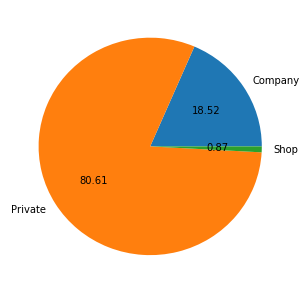

In [6]:
plt.figure(figsize=(5,5))
plt.pie(userCounts ,labels=userCounts.index,autopct='%.2f')
plt.show()

### 3.) What is the distribution of the posts grouped by user type?

In [7]:
userTypePostsCount = trainDF.groupby("user_type")["item_id"].count()
userTypePostsCount

user_type
Company     347249
Private    1075706
Shop         80469
Name: item_id, dtype: int64

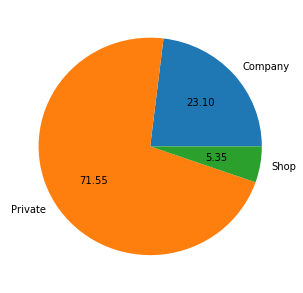

In [8]:
plt.figure(figsize=(5,5))
plt.pie(userTypePostsCount ,labels=userTypePostsCount .index,autopct='%.2f')
plt.show()

In [9]:
userTypePostsCount/userCounts

user_type
Company     2.429317
Private     1.729161
Shop       11.954984
dtype: float64

In [10]:
def getPostsByUser(userID):
    return trainDF[trainDF["user_id"] ==userID ]

def getUserType(userID):
    return tmpFrame[tmpFrame["user_id"]==userID ]

tmpFrame = trainDF.drop_duplicates("user_id")

def visPowerSellers(powerSellerThreshold_l=800,powerSellerThreshold_h=postsByUsers.max()):
    powerSellers = postsByUsers[(postsByUsers >= powerSellerThreshold_l) & (postsByUsers <= powerSellerThreshold_h) ]
    
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    powerSellersHist = powerSellers.hist()
    powerSellersHist.axes.set_ylabel("Number of Sellers")
    powerSellersHist.axes.set_xlabel("Number of Posts")
    powerSellersHist.axes.set_title("Number of users with {0} to {1} posts: {2}".format(powerSellerThreshold_l,powerSellerThreshold_h ,powerSellers.count()))
    
    plt.subplot(122)
    out = tmpFrame[tmpFrame['user_id'].isin(powerSellers.index)]
    groupCount = out.groupby("user_type")["item_id"].count()
    plt.pie(groupCount,labels=groupCount.index,autopct='%.2f')
    plt.show()
    
interact_manual(visPowerSellers,powerSellerThreshold_l=(1,postsByUsers.max()),powerSellerThreshold_h = (0,postsByUsers.max()))

interactive(children=(IntSlider(value=800, description='powerSellerThreshold_l', max=1080, min=1), IntSlider(value=1080, description='powerSellerThreshold_h', max=1080), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.visPowerSellers>

There are more posts by private users, but companies and shops tend to have more posts.

In [11]:
tmp = trainDF[trainDF["deal_probability"] > .8]["description"].dropna().apply(len)
tmp.describe()

count    89573.000000
mean       163.882599
std        239.310082
min          1.000000
25%         51.000000
50%         92.000000
75%        174.000000
max       3047.000000
Name: description, dtype: float64

In [12]:
plt.figure(figsize=(10,10))
hist = tmp[tmp<200].hist()
hist.axes.set_ylabel("Number of Listings")
hist.axes.set_xlabel("Description Length")
hist.axes.set_title("Number of Listings with > .8 Deal Probability versus Description Length")

Text(0.5,1,'Number of Listings with > .8 Deal Probability versus Description Length')

In [13]:
tmp = trainDF["description"].dropna().apply(len)
tmp.describe().astype('int32')

count    1387148
mean         192
std          295
min            1
25%           50
50%           96
75%          200
max         3212
Name: description, dtype: int32

In [14]:
percentiles = [(0,.1),(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]
counts = []
for p in percentiles:
    res = trainDF[ (trainDF["deal_probability"] >= p[0]) & (trainDF["deal_probability"] <= p[1]) ]["description"].dropna().apply(len).mean()
    counts.append(res)

plt.bar(range(10),counts)

<Container object of 10 artists>

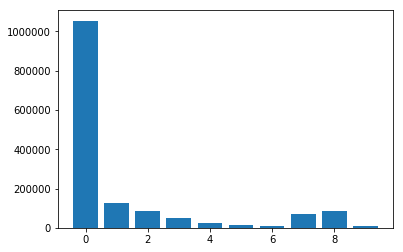

In [24]:
percentiles = [(0,.1),(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]
counts = []
for p in percentiles:
    res = trainDF[ (trainDF["deal_probability"] >= p[0]) & (trainDF["deal_probability"] <= p[1]) ]["user_type"].count()
    counts.append(res)

plt.bar(range(10),counts)
plt.show()

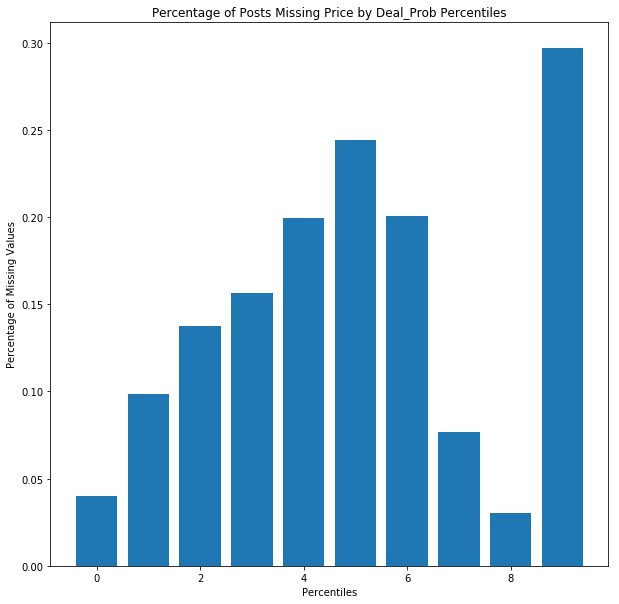

In [23]:
percentiles = [(0,.1),(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]
counts = []
for p in percentiles:
    res = trainDF[ (trainDF["deal_probability"] >= p[0]) & (trainDF["deal_probability"] <= p[1]) ]["price"].isna()
    counts.append(res.sum()/res.count())

plt.figure(figsize=(10,10))
plt.title("Percentage of Posts Missing Price by Deal_Prob Percentiles")
plt.xlabel("Percentiles")
plt.ylabel("Percentage of Missing Values")
plt.bar(range(0,10),counts)
plt.show()

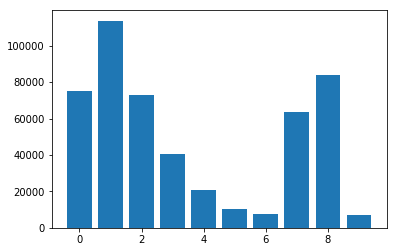

In [25]:
percentiles = [(0,.1),(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]
counts = []
for p in percentiles:
    res = trainDF[ (trainDF["deal_probability"] >= p[0]) & (trainDF["deal_probability"] <= p[1]) & trainDF["deal_probability"] ]["price"].count()
    counts.append(res)

plt.bar(range(0,10),counts)
plt.show()

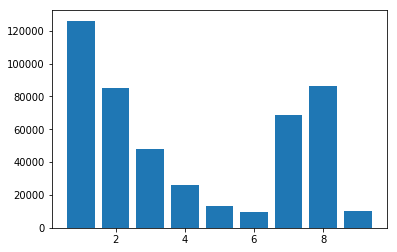

In [26]:
percentiles = [(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]
counts = []
for p in percentiles:
    counts.append(trainDF[ (trainDF["deal_probability"] >= p[0]) & (trainDF["deal_probability"] <= p[1]) ]["description"].isna().count())

plt.bar(range(1,10),counts)
plt.show()

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


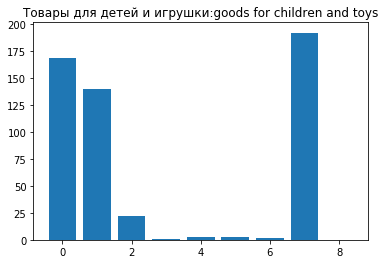

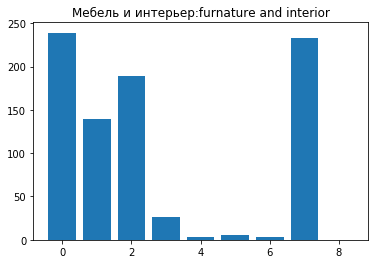

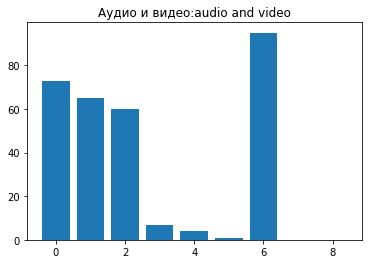

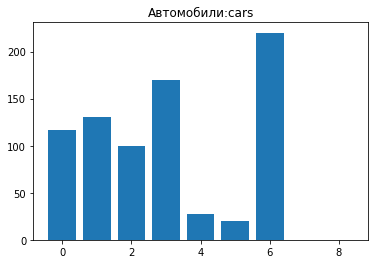

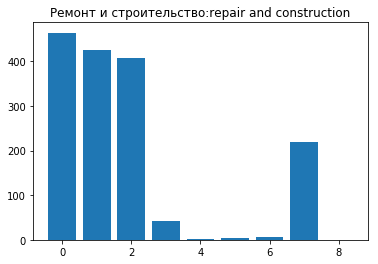

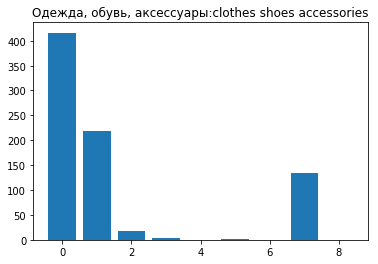

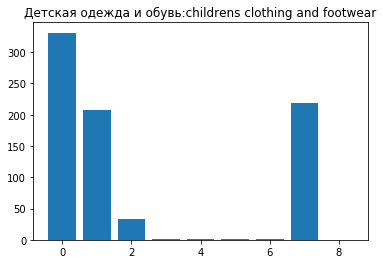

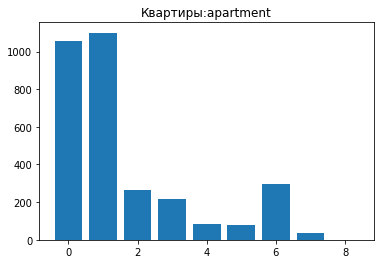

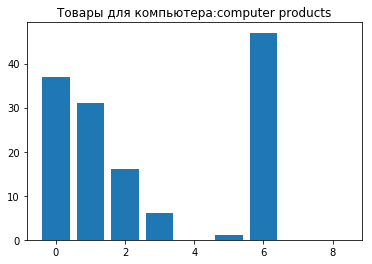

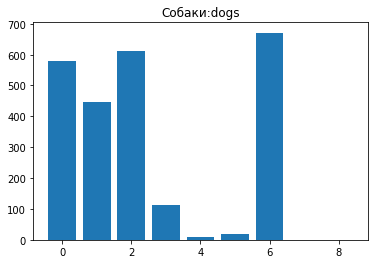

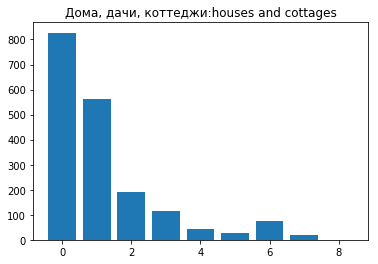

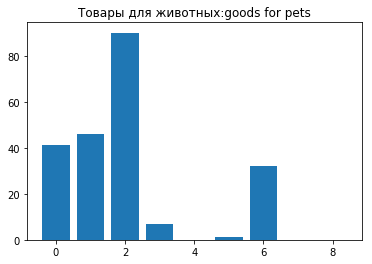

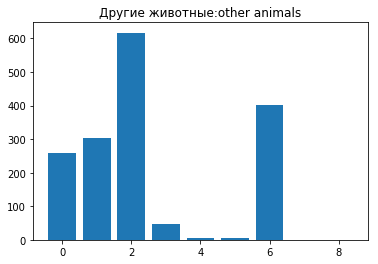

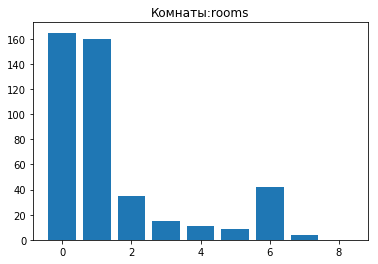

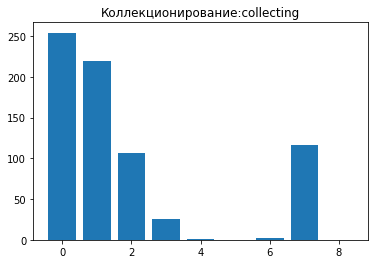

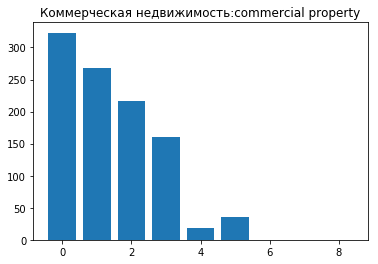

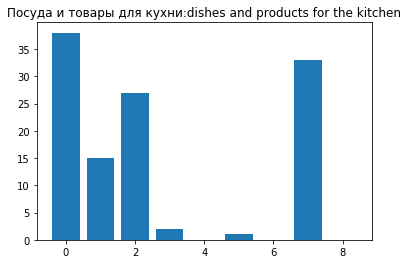

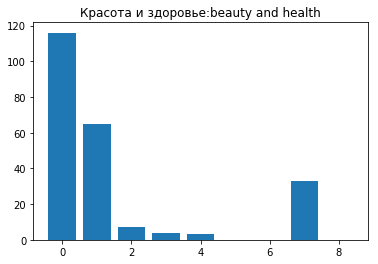

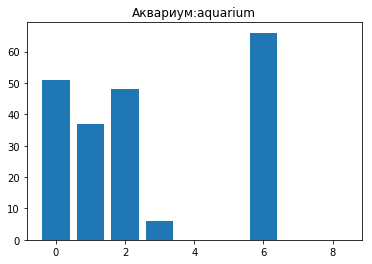

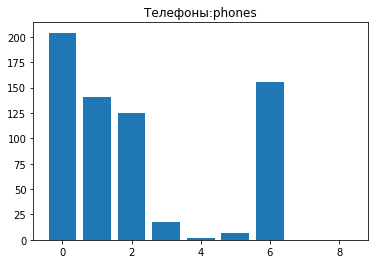

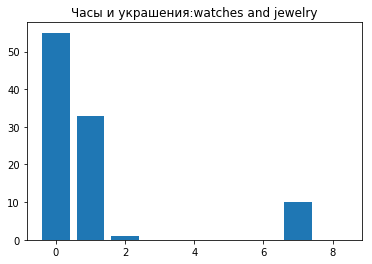

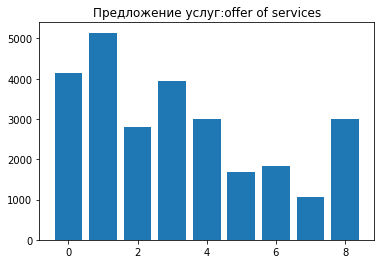

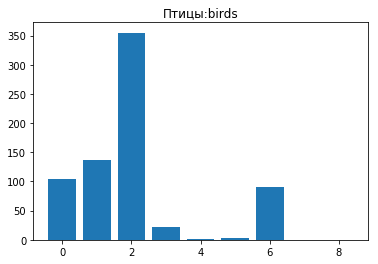

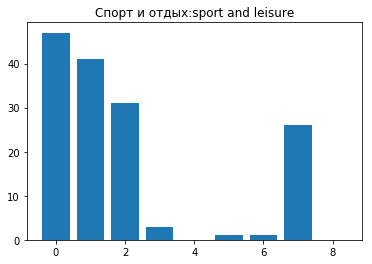

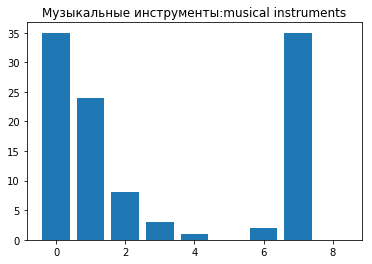

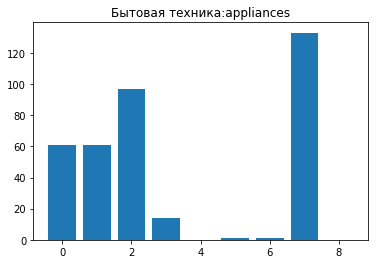

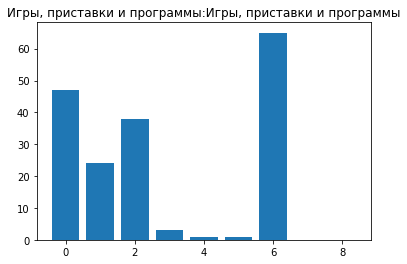

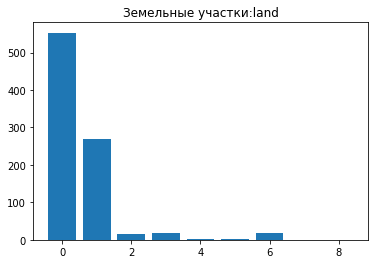

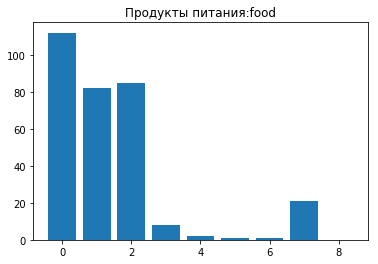

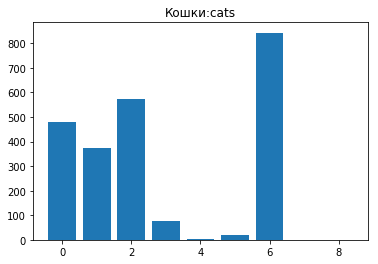

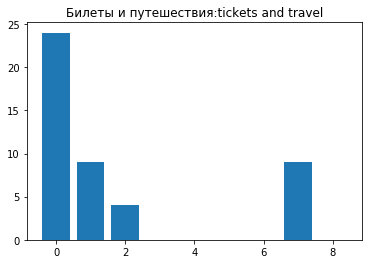

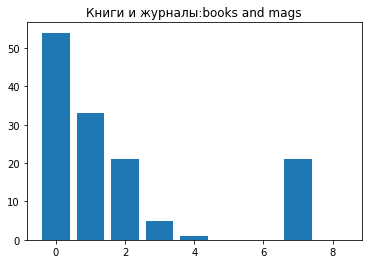

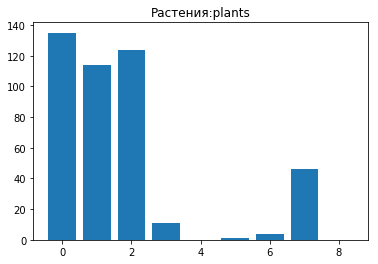

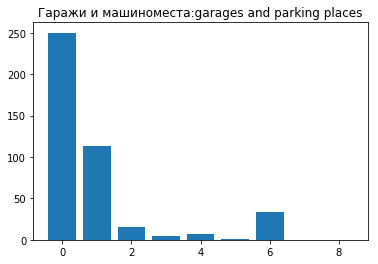

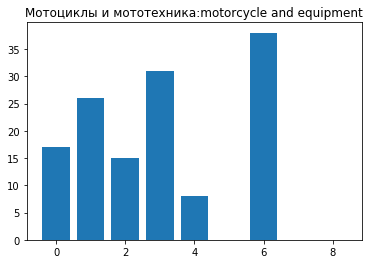

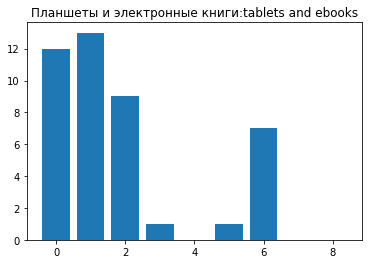

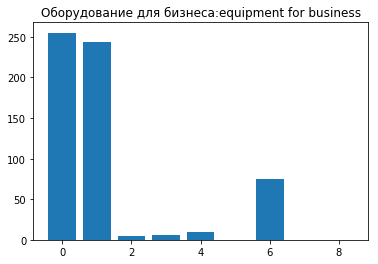

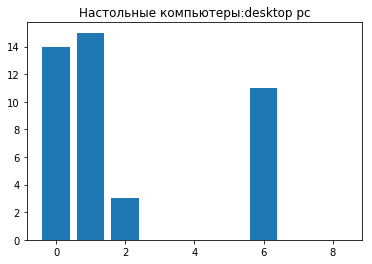

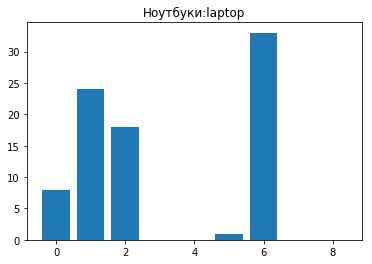

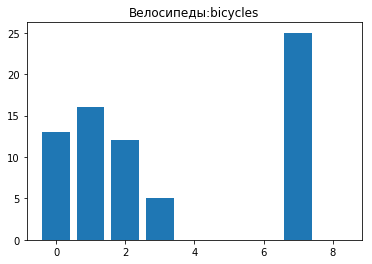

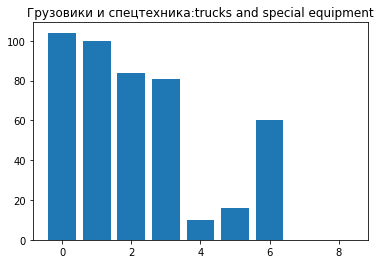

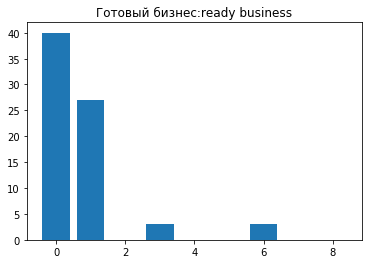

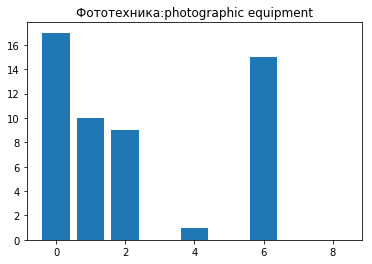

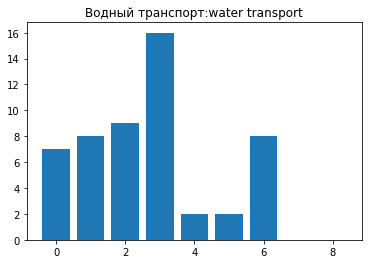

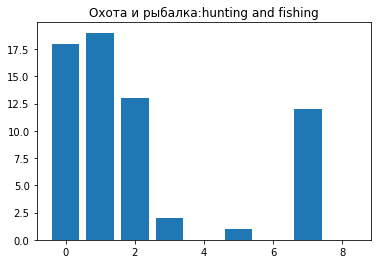

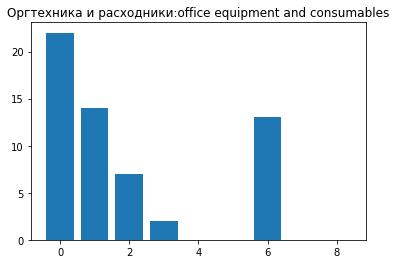

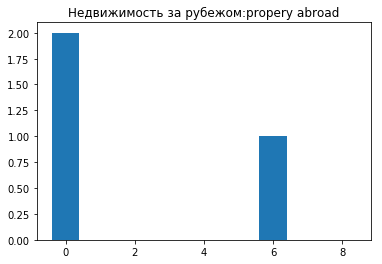

In [27]:
percentiles = [(.1,.2),(.2,.3),(.3,.4),(.4,.5),(.5,.6),(.6,.7),(.7,.8),(.8,.9),(.9,1)]
plt.figure(figsize=(20,20))
chart = []
for i in trainDF["category_name"].unique():
    tempFrame = trainDF[trainDF["category_name"] == i ]
    counts = []
    for p in percentiles:
        counts.append(tempFrame[ (tempFrame["deal_probability"] >= p[0]) & (tempFrame["deal_probability"] <= p[1]) ]["price"].isna().sum())
    
    fig, ax = plt.subplots()
    ax.set_title(i+":"+subCats[i])
    plt.bar(range(0,9),counts)
plt.show()
plt.show()

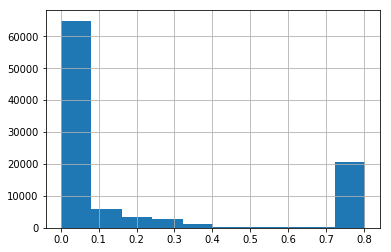

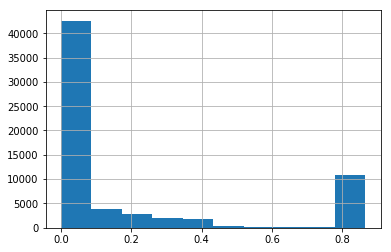

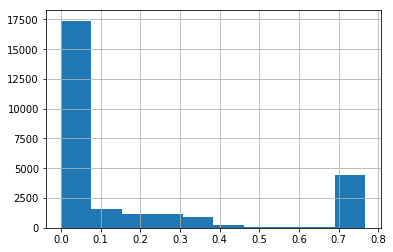

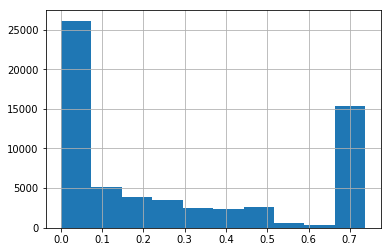

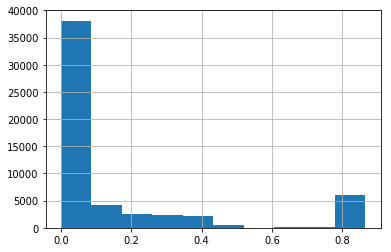

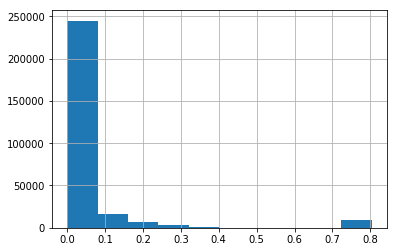

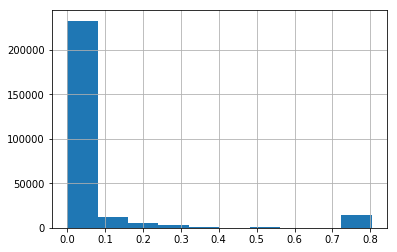

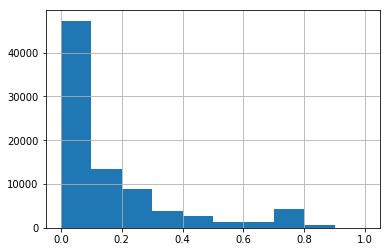

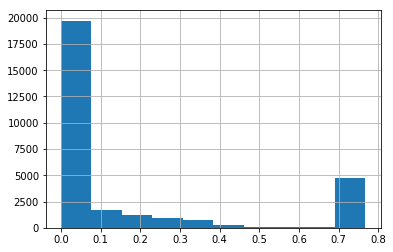

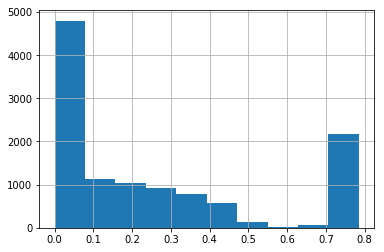

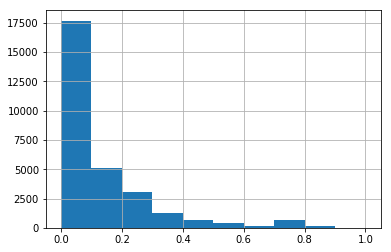

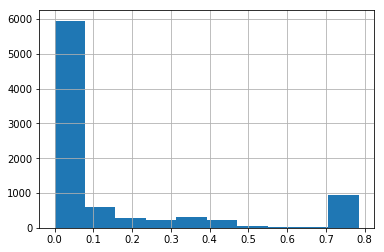

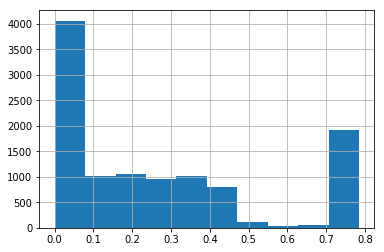

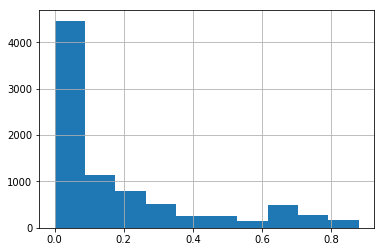

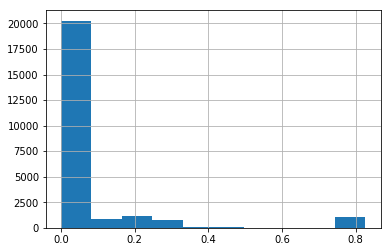

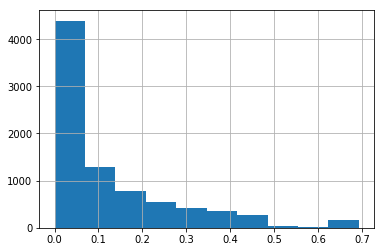

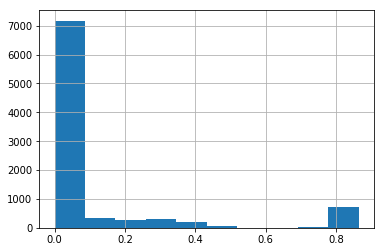

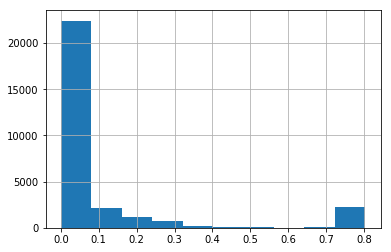

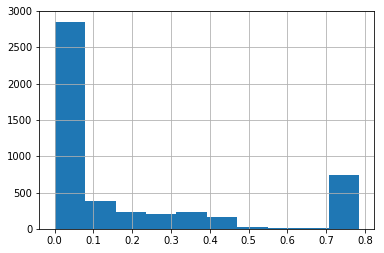

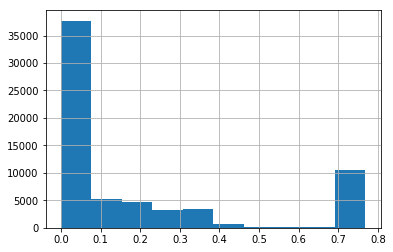

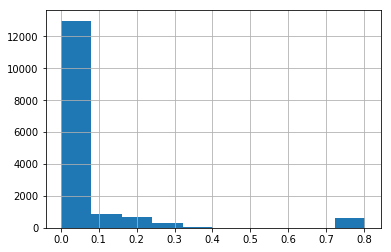

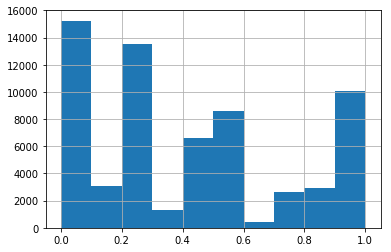

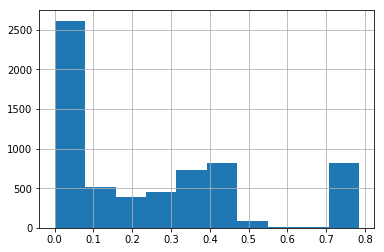

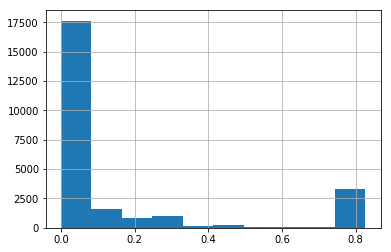

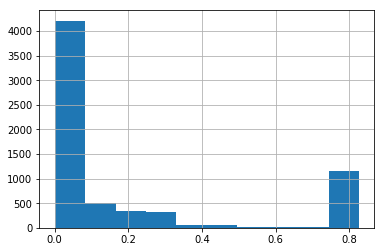

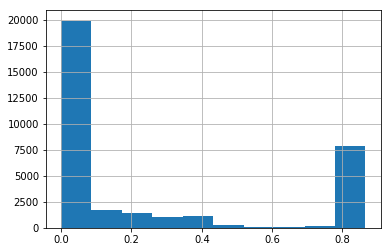

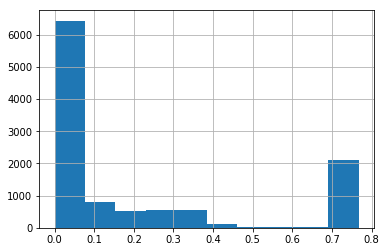

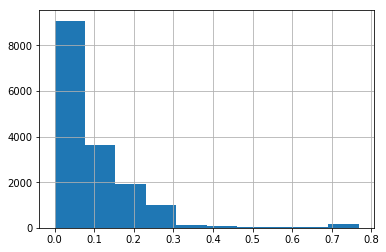

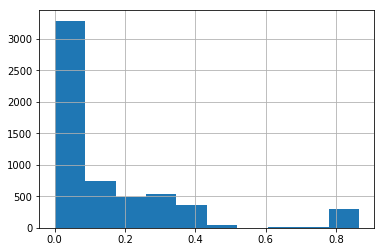

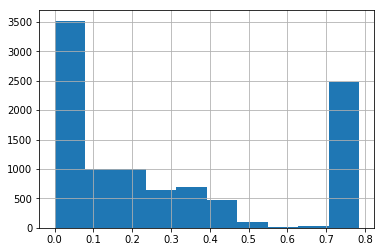

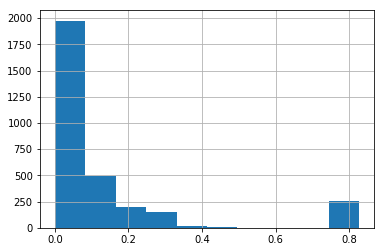

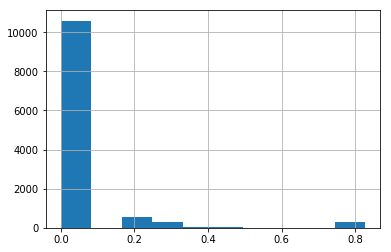

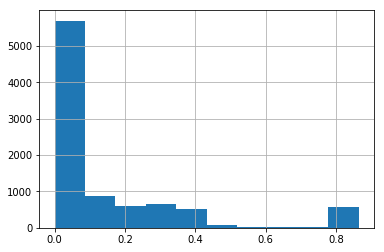

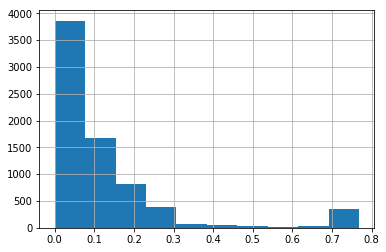

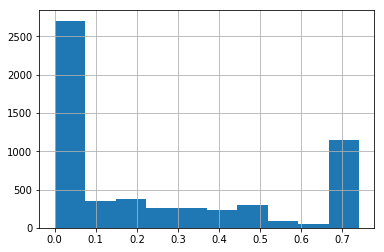

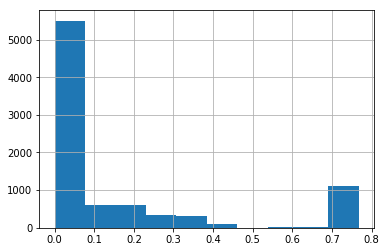

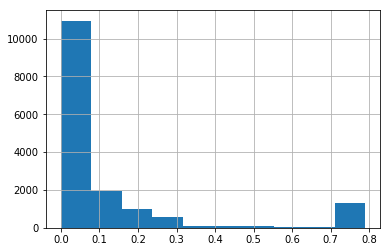

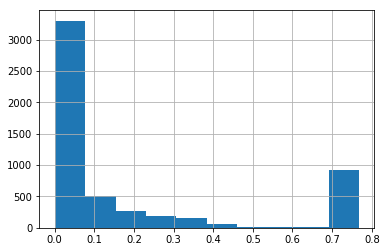

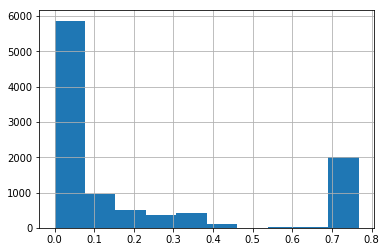

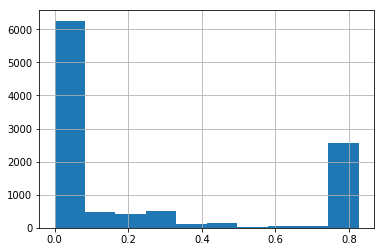

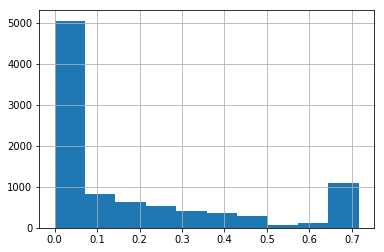

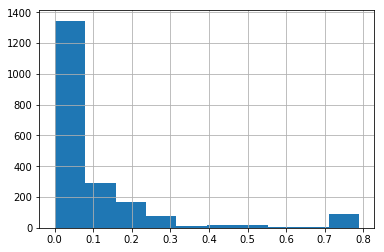

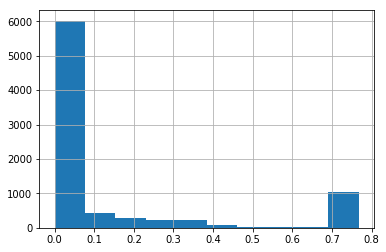

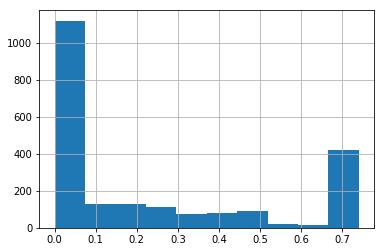

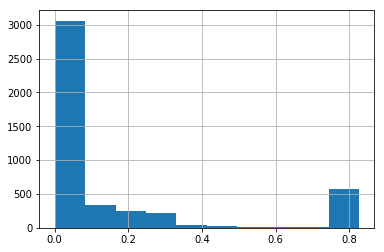

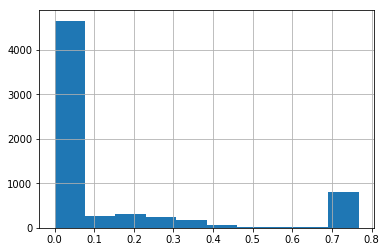

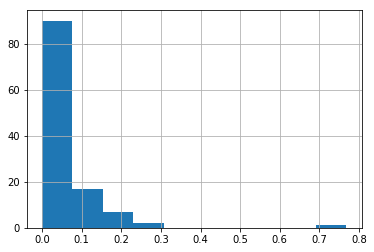

In [20]:
chart = []
for i in trainDF["category_name"].unique():
    tempFrame = trainDF[trainDF["category_name"] == i ]
    counts = []
    ax.set_title(i+":"+subCats[i])
    tempFrame["deal_probability"].hist()
    plt.show()

In [22]:
plt.figure(figsize=(20,20))
plt.pie(cnts,labels=list(map(lambda x: subCats[x],cnts.index)),autopct='%.2f')
plt.show()

NameError: name 'cnts' is not defined

In [28]:
means = []
uniqueCats = trainDF["category_name"].unique()
for i in uniqueCats:
    tempFrame = trainDF[trainDF["category_name"] == i ]
    print(i+" - "+subCats[i])
    print(tempFrame[["deal_probability"]].mean())
    

Товары для детей и игрушки - goods for children and toys
deal_probability    0.198445
dtype: float64
Мебель и интерьер - furnature and interior
deal_probability    0.191848
dtype: float64
Аудио и видео - audio and video
deal_probability    0.171572
dtype: float64
Автомобили - cars
deal_probability    0.278427
dtype: float64
Ремонт и строительство - repair and construction
deal_probability    0.146212
dtype: float64
Одежда, обувь, аксессуары - clothes shoes accessories
deal_probability    0.046447
dtype: float64
Детская одежда и обувь - childrens clothing and footwear
deal_probability    0.060834
dtype: float64
Квартиры - apartment
deal_probability    0.158154
dtype: float64
Товары для компьютера - computer products
deal_probability    0.162863
dtype: float64
Собаки - dogs
deal_probability    0.252812
dtype: float64
Дома, дачи, коттеджи - houses and cottages
deal_probability    0.124862
dtype: float64
Товары для животных - goods for pets
deal_probability    0.133637
dtype: float64
Други

In [29]:
trainDF[trainDF["deal_probability"] >= .9].head(10)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
65,92013ca1fe79,f04d65543e01,Кемеровская область,Новокузнецк,Услуги,Предложение услуг,"Ремонт, строительство",Ремонт квартиры,NaN,"Монтаж дверей, проемов, откосов, арок","Установка межкомнатных дверей 1200-1600руб, мо...",1000.0,160,2017-03-28,Company,e85d2c9aded83478781979d11d7f1668c82ce2e3571bea...,1373.0,1.0
66,c6239fc67a6f,9c9c9121ba17,Краснодарский край,Краснодар,Услуги,Предложение услуг,"Красота, здоровье",NaN,NaN,"Наращивание ногтей, коррекция","Мастер с 9 летним стажем ждет Вас, красавицы! ...",500.0,2,2017-03-25,Private,4e46c9df2524b3128f47af23cb00d62754bc8769625e11...,2275.0,1.0
207,44aa121e4559,6a67fb2b7d8e,Башкортостан,Стерлитамак,Услуги,Предложение услуг,"Транспорт, перевозки",Коммерческие перевозки,NaN,Грузоперевозки длинномер бортовой открытый,Предлагаю услуги по перевозке грузов в любом н...,NaN,1,2017-03-15,Private,d9a6d9e9836ed94272742fa3473899692442b2bf7a49fe...,1057.0,1.0
254,b16d1b27c975,2518a9a3c7d7,Ростовская область,Ростов-на-Дону,Услуги,Предложение услуг,"Транспорт, перевозки",Коммерческие перевозки,NaN,Грузоперевозки по юфо скфо крым,Ежедневно свободный транспорт: ОСТРОВ КРЫМ: Си...,500.0,6,2017-03-20,Private,944ed4f29228c2282b3fa8c17e7e1736a41a18dae10ba2...,1055.0,1.0
332,fe03dbc60ccf,fe1981c980cb,Свердловская область,Серов,Услуги,Предложение услуг,"Ремонт, строительство","Строительство домов, коттеджей",NaN,Подъем домов,"Подъем домов, замена венцов, заливка фундамент...",NaN,93,2017-03-21,Company,209e5f78c17d2b20672b8bbfac18457099439139db042d...,1308.0,1.0
451,a0edbae2cfee,f4b723850dca,Волгоградская область,Волгоград,Услуги,Предложение услуг,"Транспорт, перевозки",Автосервис,NaN,"Покраска авто, кузовные, ремонт","✔Сварочные работы, замена порогов, днища./\n✔П...",NaN,44,2017-03-23,Private,2000ae8f392491ca3d2c7f7e6e3e34ce979bf06c7d6e17...,2264.0,1.0
666,484c58960d83,b9217bb75c84,Красноярский край,Ачинск,Услуги,Предложение услуг,"Красота, здоровье",Услуги парикмахера,NaN,Архитектура бровей,Коррекция бровей по типу лица.Окрашивание крас...,200.0,5,2017-03-20,Private,6ce6c6603c9574a6eb57545c247fbdb264eef265b90ed4...,787.0,1.0
704,4743f5357b2c,7b7c6f8c8772,Краснодарский край,Новороссийск,Услуги,Предложение услуг,"Транспорт, перевозки",Коммерческие перевозки,NaN,Длинномер,Услуги длинномера !!! перевозка различных груз...,1000.0,58,2017-03-17,Company,040959321972ff9fa3d035539206226b8035ead0d97d9f...,1057.0,1.0
807,df75bd2fb71d,e2191a0a1828,Татарстан,Казань,Услуги,Предложение услуг,"Обучение, курсы",NaN,NaN,Репетиттор татарского языка,Репетитор татарского языка с высшим педагогиче...,350.0,1,2017-03-20,Private,aa5fd0260018592c250b27533046a12652a554ba7b595d...,2263.0,1.0
814,bbf7a2942926,c11da079f2cc,Нижегородская область,Нижний Новгород,Услуги,Предложение услуг,Уход за животными,NaN,NaN,Ветеринар вызов на дом,Лечение и хирургия с выездом на дом./\nВ Любой...,200.0,13,2017-03-19,Private,b81c044fe032ec03daf841ffa7e49c2fdaf8c60f4fe505...,2055.0,1.0


In [30]:
powerSellers = postsByUsers[postsByUsers >= 50]
powerShops = tmpFrame[tmpFrame['user_id'].isin(powerSellers.index) & (tmpFrame['user_type'] == "Shop")]

In [31]:
user = powerShops[0:1]["user_id"].as_matrix()[0]
trainDF[ trainDF["user_id"] == user].head(50)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
38,f55eed4e831e,7e8eb4a5d1d5,Калининградская область,Гвардейск,Недвижимость,Коммерческая недвижимость,Продам,Складское помещение,NaN,Склад 70 м²,"Продается склад ГСМ, по адресу п. Истровка, Ка...",800000.0,6004,2017-03-28,Shop,NaN,NaN,0.06626
10828,a4fcfe5defb5,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,2,Вторичка,"2-к квартира, 57 м², 3/8 эт.",Продается 2-комнатная квартира в строящемся до...,2370000.0,5769,2017-03-17,Shop,NaN,NaN,0.10324
23300,cc645f96297b,7e8eb4a5d1d5,Калининградская область,Светлогорск,Недвижимость,Квартиры,Продам,Студия,Вторичка,"Студия, 36 м², 4/5 эт.",Продается квартира-студия с видом на море в г...,4000000.0,5912,2017-03-24,Shop,91f5d55d60b33c3deb439ad8925cbe24ba3cb2b245996a...,2219.0,0.00000
25428,f02f67dfdba6,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,2,Вторичка,"2-к квартира, 42.6 м², 5/5 эт.","42,6\18+9,6\6 кв.м., есть тех.этаж, ц\о, углов...",2400000.0,5903,2017-03-24,Shop,0cb2b0beb1e96fb8f6ed1f3fa46a4e4740b20412b21b7b...,2217.0,0.05219
33140,79e9b153b200,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,1,Новостройка,"1-к квартира, 42 м², 7/9 эт.",Продается 1-комнатная квартира на ул. Леонова ...,2700000.0,5791,2017-03-17,Shop,3ab9d2fd8f489abc92a11b3934ce058a5e2404b237eef4...,2218.0,0.00000
46959,a72f7185d25d,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,1,Новостройка,"1-к квартира, 49.6 м², 6/7 эт.",ПРЯМАЯ ПРОДАЖА БЕЗ КОМИССИЙ-евро-однокомнатная...,3025200.0,5648,2017-03-15,Shop,9cd709462cffea3686ecbb2a5195a2853bcf874c745fb0...,2218.0,0.00817
57701,714d2dbabad4,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,4,Вторичка,"4-к квартира, 200 м², 4/4 эт.",Продается 4-комнатная квартира (мансарда) в це...,17000000.0,5614,2017-03-15,Shop,fb746ef899bf80162eb6caca92a5dced2654cac3dc33f2...,1516.0,0.07612
63161,dca65ee38114,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Сдам,На длительный срок,2,"2-к квартира, 68 м², 6/8 эт.",Сдается 2-комнатная квартира на ул. Горького в...,20000.0,5973,2017-03-27,Shop,cbbb8bec55ed02c2d94ace0538291f577d4fb6fe684ae4...,2219.0,0.03703
65543,503f3391d713,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,3,Новостройка,"3-к квартира, 80 м², 4/9 эт.","Строительный адрес ул. Елизаветинская, д.1 (ор...",3200000.0,5870,2017-03-23,Shop,2bb6b86d6817e35dbe2406651fbe9554fc592b50678d61...,2218.0,0.06491
73896,94e8b56132fc,7e8eb4a5d1d5,Калининградская область,Калининград,Недвижимость,Квартиры,Продам,1,Вторичка,"1-к квартира, 45 м², 3/8 эт.",Продается 1-комнатная квартира в новостройке К...,2700000.0,5786,2017-03-17,Shop,NaN,NaN,0.05219


In [32]:
(trainDF["deal_probability"] <= 0.1).sum()

1054761

In [33]:
(trainDF["deal_probability"] > 0.1).sum()

448663

In [34]:
1054761 + 448663

1503424